In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# img = cv2.imread("./ecr-meta/ecr-science-image.jpg")
img = cv2.imread("/Users/yongho.kim/Downloads/1670612408304471731-sample.jpg")
rect = "250 850 400 600"

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
sp = rect.split(" ")

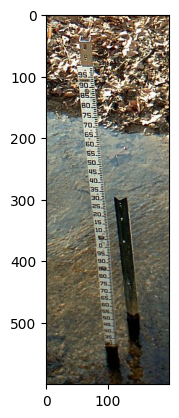

In [11]:
cropped = img[int(sp[0]):int(sp[1]), int(sp[2]):int(sp[3])]
plt.imshow(cropped)

In [52]:
def draw_line(img, height):
    return cv2.line(img, (90, height), (120, height), color=(255, 0, 0), thickness=1)

def draw_lines(img, heights):
    for height in heights:
        img = draw_line(img, height)
    return img

We put numbers to the `draw_line` function as a height to figure out the mapping between pixel heights and actual centimeter.

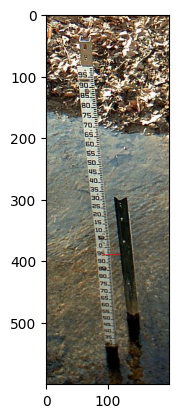

In [54]:
plt.imshow(draw_line(cropped.copy(), 390))

In [55]:
lines = [535, 525, 516, 504, 495, 483, 474, 463, 451, 440, 427, 415, 402, 391]
mapping = "535,30 525,35 516,40 504,45 495,50 483,55 474,60 463,65 451,70 440,75 427,80 415,85 402,90 391,95"

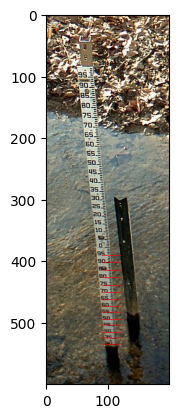

In [56]:
plt.imshow(draw_lines(cropped.copy(), lines))

In [79]:
def parse_mapping_table(lines):
    xp = []
    fp = []
    for line in lines.split(" "):
        pixel_height, centimeter = line.split(",")
        xp.append(float(pixel_height))
        fp.append(float(centimeter))
    return np.array(xp), np.array(fp)

def test_get_water_depth(lines, pixel_height):
    xp, fp = parse_mapping_table(lines)
    # check if xp is increasing. np.interp works only with increasing xp
    if np.all(np.diff(xp) > 0):
        return np.interp(pixel_height, xp, fp, left=-999, right=-999)
    else:
        return np.interp(pixel_height, xp[::-1], fp[::-1], left=-999, right=-999)

Now, we test a few cases based on our observation,

In [81]:
# tests consists of a pixel height and a reasonable height in centimeter
# tolerance is 1 cm
tolerance = 1.
tests = [
    (530, 32.5),
    (537, -999.),
    (430, 78),
    
]

By running below, we should not see any output if tests are all passed,

In [82]:
for v, expected in tests:
    predicted = test_get_water_depth(mapping, v)
    if abs(predicted - expected) > tolerance:
        print(f'for {v} we expected {expected}, but received {predicted}')

32.5
-999.0
78.84615384615384
